In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc

In [3]:
data=pd.read_csv("GSE92332_AtlasFullLength_TPM.txt",sep="\t").T

# preprocess data

In [3]:
adata = sc.read("preprocessedAdata.h5ad")

Flavours for identifying highly variable genes HVGs:
1. seurat_v3:
adaped for scRNA seq data
sophisticated modelling
Widely used
Cons: requires parameter tuning for best results and is computationally intensive

2. Cell_ranger:
Less control but simple

3. dispersion:
Direct approach: calcluates statsistics such as variance and mean for each gene and identifies objectively
customisatble but sensitive to noise

4. Pearson_residuals: 
can be used to normalise the data 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/threadpoolctl.py:1223: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


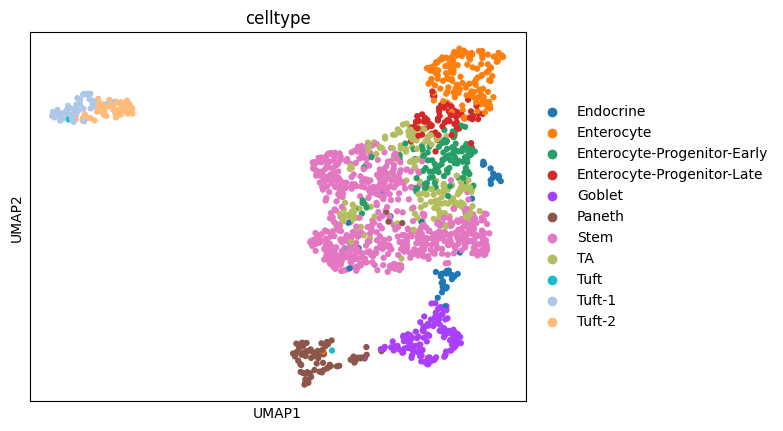

In [26]:
n = 15
m = 1
adata.var_names = adata.var_names.str.capitalize()
genes_to_remove = ['Mcm5', 'Pcna', 'Tyms', 'Fen1', 'Mcm2', 'Mcm4', 'Rrm1', 'Ung', 'Gins2', 'Mcm6', 'Cdca7',
'Dtl', 'Prim1', 'Uhrf1', 'Mlf1ip', 'Hells', 'Rfc2', 'Rpa2', 'Nasp', 'Rad51ap1', 'Gmnn', 'Wdr76',
'Slbp', 'Ccne2', 'Ubr7', 'Pold3', 'Msh2', 'Atad2', 'Rad51', 'Rrm2', 'Cdc45', 'Cdc6', 'Exo1', 'Tipin',
'Dscc1', 'Blm', 'Casp8ap2', 'Usp1', 'Clspn', 'Pola1', 'Chaf1b', 'Brip1', 'E2f8', 'Hmgb2', 'Cdk1',
'Nusap1', 'Ube2c', 'Birc5', 'Tpx2', 'Top2a', 'Ndc80', 'Cks2', 'Nuf2', 'Cks1b', 'Mki67', 'Tmpo',
'Cenpf', 'Tacc3', 'Fam64a', 'Smc4', 'Ccnb2', 'Ckap2l', 'Ckap2', 'Aurkb', 'Bub1', 'Kif11', 'Anp32e',
'Tubb4b', 'Gtse1', 'Kif20b', 'Hjurp', 'Cdca3', 'Hn1', 'Cdc20', 'Ttk', 'Cdc25c', 'Kif2c', 'Rangap1',
'Ncapd2', 'Dlgap5', 'Cdca2', 'Cdca8', 'Ect2', 'Kif23', 'Hmmr', 'Aurka', 'Psrc1', 'Anln', 'Lbr',
'Ckap5', 'Cenpe', 'Ctcf', 'Nek2', 'G2e3', 'Gas2l3', 'Cbx5', 'Cenpa']

adata_filtered = adata
sc.pp.pca(adata_filtered)
sc.pp.neighbors(adata_filtered, n_neighbors=n)
sc.tl.umap(adata_filtered, min_dist=m)
sc.pl.umap(adata_filtered, color='celltype')


In [21]:
from sklearn.cluster import SpectralClustering
K = 10 # number of celltypes 
specCluster = SpectralClustering(n_clusters=K, random_state=0)

adata_filtered.obs['Spectral Cluster'] = specCluster.fit_predict(adata_filtered.obsm['X_umap'])


KeyError: 'X_umap'

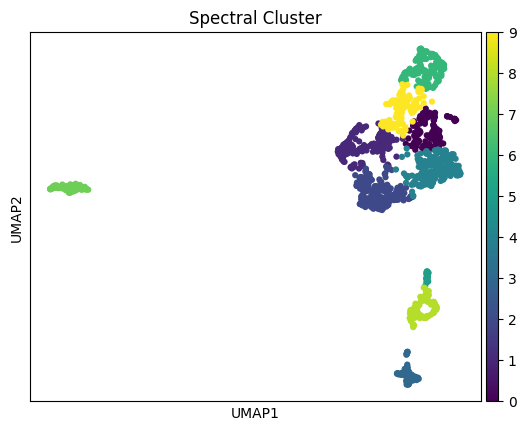

In [ ]:
adata = adata_filtered
sc.pp.neighbors(adata)

sc.pl.umap(adata, color="Spectral Cluster", ncols=1, legend_fontoutline=2,legend_fontsize=5)

In [1]:
sc.pl.pca(adata, 
          color=["Spectral Cluster","celltype"], 
          ncols=1, 
          legend_fontoutline=2, 
          legend_fontsize=10,  
          size=40, 
          palette=sc.pl.palettes.default_20, 
          return_fig=True, 
          title = ['Umap plot of dimensionally reduced data with pca with Spectral Clustering', "PCA of scRNA-seq Data with Cell Type Annotations"], 
          annotate_var_explained=True
          )  

NameError: name 'sc' is not defined

Interestingly, using a lower number of PCs actually generates better results, although this is likely due to Spectral Clustering performing better on data with higher proportional variance.

# Analysing Spectral Clusters

In [23]:
for i in range(K):
    print(f"Cluster {i}")
    print(adata.obs['celltype'][adata.obs['Spectral Cluster'] == i].value_counts())

Cluster 0
celltype
Enterocyte-Progenitor-Early    71
TA                             46
Endocrine                      14
Enterocyte-Progenitor-Late      3
Stem                            3
Enterocyte                      0
Goblet                          0
Paneth                          0
Tuft                            0
Tuft-1                          0
Tuft-2                          0
Name: count, dtype: int64
Cluster 1
celltype
Stem                           199
TA                              17
Enterocyte-Progenitor-Early      3
Endocrine                        1
Paneth                           1
Enterocyte                       0
Enterocyte-Progenitor-Late       0
Goblet                           0
Tuft                             0
Tuft-1                           0
Tuft-2                           0
Name: count, dtype: int64
Cluster 2
celltype
Stem                           195
TA                              33
Enterocyte-Progenitor-Early      6
Endocrine                  

In [15]:
celltypes = adata.obs["celltype"].unique()  

for celltype in celltypes:  
    # print the number of cells with celltype = celltype in the data
    print(f"Number of cells with celltype {celltype}:")
    print(adata.obs["celltype"].value_counts()[celltype])


Number of cells with celltype Enterocyte:
148
Number of cells with celltype Stem:
616
Number of cells with celltype Goblet:
123
Number of cells with celltype TA:
194
Number of cells with celltype Enterocyte-Progenitor-Late:
68
Number of cells with celltype Endocrine:
43
Number of cells with celltype Enterocyte-Progenitor-Early:
106
Number of cells with celltype Paneth:
77
Number of cells with celltype Tuft-1:
49
Number of cells with celltype Tuft-2:
49
Number of cells with celltype Tuft:
3


We notice Tuft cells are very well separated from the rest of the data, so we are going to remove them and see if we can split up the other data further

In [16]:
celltypes_to_omit = ['Tuft-1', 'Tuft-2', 'Tuft']

# Filter the adata object to exclude the specified cell types
filtered_adata = adata[~adata.obs['celltype'].isin(celltypes_to_omit)].copy()

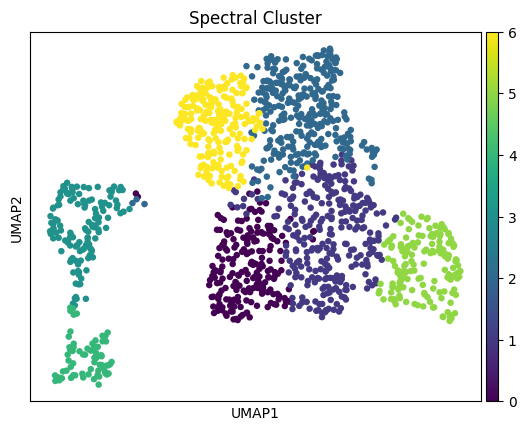

Cluster 0
celltype
Stem                           191
TA                               7
Endocrine                        5
Enterocyte-Progenitor-Early      1
Paneth                           1
Enterocyte                       0
Enterocyte-Progenitor-Late       0
Goblet                           0
Name: count, dtype: int64
Cluster 1
celltype
Enterocyte-Progenitor-Early    101
TA                              97
Enterocyte-Progenitor-Late      57
Stem                            28
Enterocyte                       6
Endocrine                        1
Goblet                           0
Paneth                           0
Name: count, dtype: int64
Cluster 2
celltype
Stem                           214
TA                              58
Endocrine                       32
Paneth                           2
Enterocyte-Progenitor-Early      1
Enterocyte                       0
Enterocyte-Progenitor-Late       0
Goblet                           0
Name: count, dtype: int64
Cluster 3
celltype
Goblet

In [17]:


def spectralClustering(K, data, n):
    specCluster = SpectralClustering(n_clusters=K, random_state=41)
    sc.pp.pca(data)
    data.obs['Spectral Cluster'] = specCluster.fit_predict(data.obsm['X_umap'])

spectralClustering(7, filtered_adata, 3)

def analysis(adata, K):
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)

    sc.pl.umap(adata, color="Spectral Cluster", ncols=1, legend_fontoutline=2,legend_fontsize=5)
    for i in range(K):
        print(f"Cluster {i}")
        print(adata.obs['celltype'][adata.obs['Spectral Cluster'] == i].value_counts())

analysis(filtered_adata, 7)

We must maintain the high variance, so number of PCs is only 2 here. We also notice here that Goblet cells are very well identitified.

In [18]:
celltypes_to_omit = ['Tuft-1', 'Tuft-2', 'Tuft', 'Goblet']

# Filter the adata object to exclude the specified cell types
filtered_adata2 = adata[~adata.obs['celltype'].isin(celltypes_to_omit)].copy()

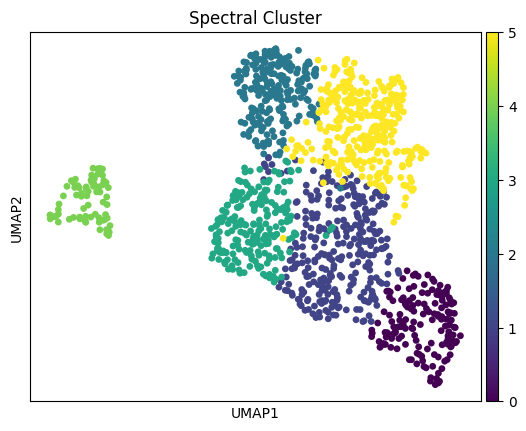

Cluster 0
celltype
Enterocyte                     141
Enterocyte-Progenitor-Late      11
Endocrine                        0
Enterocyte-Progenitor-Early      0
Paneth                           0
Stem                             0
TA                               0
Name: count, dtype: int64
Cluster 1
celltype
Enterocyte-Progenitor-Early    101
TA                             100
Enterocyte-Progenitor-Late      57
Stem                            28
Enterocyte                       6
Endocrine                        1
Paneth                           0
Name: count, dtype: int64
Cluster 2
celltype
Stem                           183
TA                              32
Endocrine                        3
Enterocyte-Progenitor-Early      3
Enterocyte                       0
Enterocyte-Progenitor-Late       0
Paneth                           0
Name: count, dtype: int64
Cluster 3
celltype
Stem                           193
TA                               7
Endocrine                        5
Entero

In [19]:
spectralClustering(6, filtered_adata2, 2)
analysis(filtered_adata2, 6)

In [20]:
celltypes_to_omit = ['Tuft-1', 'Tuft-2', 'Tuft', 'Goblet', 'Paneth']

# Filter the adata object to exclude the specified cell types
filtered_adata4 = adata[~adata.obs['celltype'].isin(celltypes_to_omit)].copy()

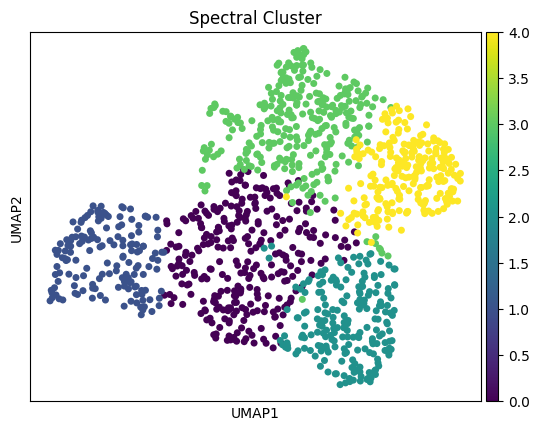

Cluster 0
celltype
Enterocyte-Progenitor-Early    101
TA                             101
Enterocyte-Progenitor-Late      57
Stem                            28
Enterocyte                       6
Endocrine                        1
Name: count, dtype: int64
Cluster 1
celltype
Enterocyte                     141
Enterocyte-Progenitor-Late      11
Endocrine                        0
Enterocyte-Progenitor-Early      0
Stem                             0
TA                               0
Name: count, dtype: int64
Cluster 2
celltype
Stem                           194
TA                               7
Endocrine                        5
Enterocyte-Progenitor-Early      1
Enterocyte                       0
Enterocyte-Progenitor-Late       0
Name: count, dtype: int64
Cluster 3
celltype
Stem                           211
TA                              54
Endocrine                       34
Enterocyte                       1
Enterocyte-Progenitor-Early      1
Enterocyte-Progenitor-Late       0
Name: 

In [21]:
spectralClustering(5, filtered_adata4, 3)
analysis(filtered_adata4, 5)

In [22]:
celltypes_to_omit = ['Tuft-1', 'Tuft-2', 'Tuft', 'Goblet', 'Paneth', 'Enterocyte', 'Stem']

# Filter the adata object to exclude the specified cell types
filtered_adata5 = adata[~adata.obs['celltype'].isin(celltypes_to_omit)].copy()

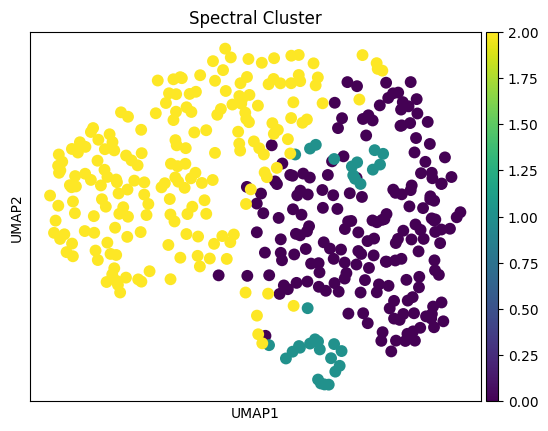

Cluster 0
celltype
TA                             127
Enterocyte-Progenitor-Early     48
Endocrine                        7
Enterocyte-Progenitor-Late       0
Name: count, dtype: int64
Cluster 1
celltype
Endocrine                      32
Enterocyte-Progenitor-Early     0
Enterocyte-Progenitor-Late      0
TA                              0
Name: count, dtype: int64
Cluster 2
celltype
Enterocyte-Progenitor-Late     68
TA                             67
Enterocyte-Progenitor-Early    58
Endocrine                       4
Name: count, dtype: int64


In [23]:
spectralClustering(3, filtered_adata5, 2)
analysis(filtered_adata5, 3)

In [24]:
celltypes_to_omit = ["Stem"]

# Filter the adata object to exclude the specified cell types
filtered_adata3 = adata[adata.obs['celltype'].isin(celltypes_to_omit)].copy()

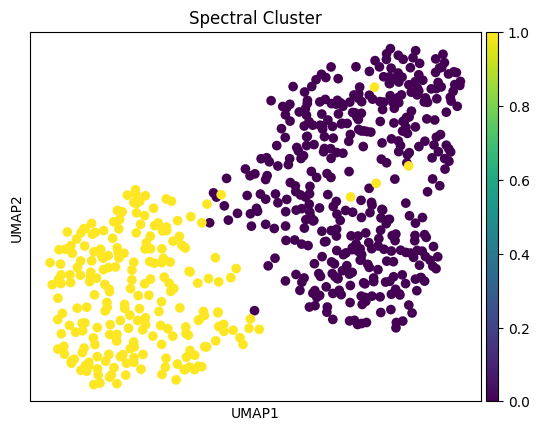

Cluster 0
celltype
Stem    391
Name: count, dtype: int64
Cluster 1
celltype
Stem    225
Name: count, dtype: int64
Cluster 2
celltype
Stem    0
Name: count, dtype: int64


In [25]:
spectralClustering(2, filtered_adata3, 2)
analysis(filtered_adata3, 3)

c:\Users\inigo\OneDrive\Documents\GitHub\PrincOfProg\PoP_venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
c:\Users\inigo\OneDrive\Documents\GitHub\PrincOfProg\PoP_venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:453: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
c:\Users\inigo\OneDrive\Documents\GitHub\PrincOfProg\PoP_venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
c:\Users\inigo\OneDrive\Documents\GitHub\PrincOfProg\PoP_venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\inigo\OneDrive\Documents\GitHub\PrincOfProg\PoP_venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: R

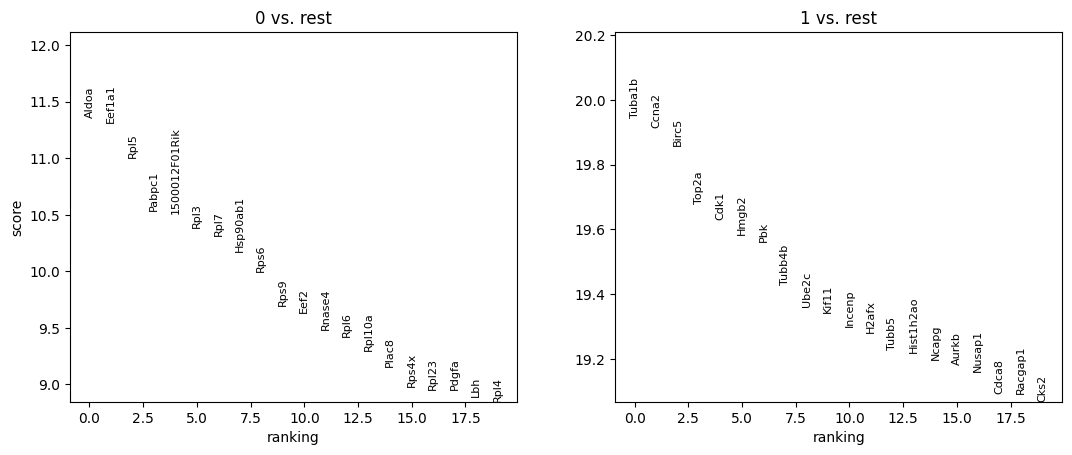

In [26]:
filtered_adata3.obs['Spectral Cluster'] = filtered_adata3.obs['Spectral Cluster'].astype('category')

sc.tl.rank_genes_groups(filtered_adata3, groupby='Spectral Cluster', method='wilcoxon')
sc.pl.rank_genes_groups(filtered_adata3, n_genes=20, sharey=False)


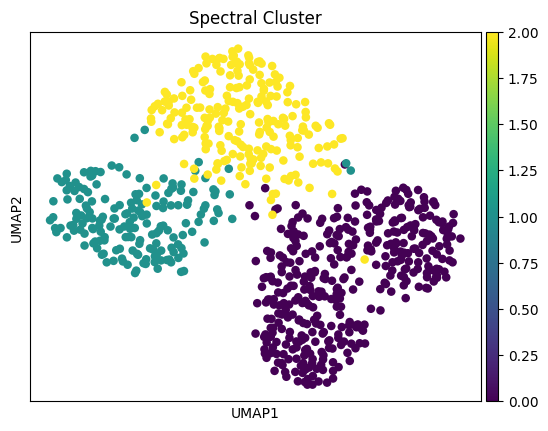

Cluster 0
celltype
Stem                           391
Enterocyte-Progenitor-Early      0
Enterocyte-Progenitor-Late       0
Name: count, dtype: int64
Cluster 1
celltype
Enterocyte-Progenitor-Early    101
Enterocyte-Progenitor-Late      68
Stem                             8
Name: count, dtype: int64
Cluster 2
celltype
Stem                           217
Enterocyte-Progenitor-Early      5
Enterocyte-Progenitor-Late       0
Name: count, dtype: int64


In [27]:
celltypes_to_include = ["Stem", 'Enterocyte-Progenitor-Early', 'Enterocyte-Progenitor-Late']

# Filter the adata object to exclude the specified cell types
filtered_adata3 = adata[adata.obs['celltype'].isin(celltypes_to_include)].copy()
spectralClustering(3, filtered_adata3, 3)
analysis(filtered_adata3, 3)

We can conclude that Stem cell DNA is differentiable from Enterocyte cell DNA

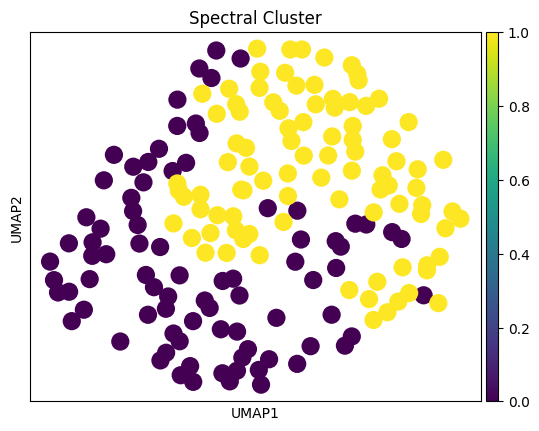

Cluster 0
celltype
Enterocyte-Progenitor-Late     64
Enterocyte-Progenitor-Early    19
Name: count, dtype: int64
Cluster 1
celltype
Enterocyte-Progenitor-Early    87
Enterocyte-Progenitor-Late      4
Name: count, dtype: int64


In [28]:
celltypes_to_include = ['Enterocyte-Progenitor-Early', 'Enterocyte-Progenitor-Late']

# Filter the adata object to exclude the specified cell types
filtered_adata4 = adata[adata.obs['celltype'].isin(celltypes_to_include)].copy()
spectralClustering(2, filtered_adata4, 4)
analysis(filtered_adata4, 2)

In [1]:
import scanpy as sc

# List of cell cycle-related genes with only the first letter capitalized
cell_cycle_genes = [
    "Ccna1", "Ccna2", "Ccnb1", "Ccnb2", "Ccnd1", "Ccnd2", "Ccnd3", "Ccne1", "Ccne2",
    "Cdk1", "Cdk2", "Cdk4", "Cdk6", "Cdkn2a", "Cdkn2b", "Cdkn2c", "Cdkn2d", "Cdkn1a",
    "Cdkn1b", "Cdkn1c", "Rb1", "E2f1", "Cdc25a", "Cdc25b", "Cdc25c", "Wee1", "Chek1",
    "Chek2", "Tp53", "Atm", "Atr", "Brca1", "Brca2", "Mad1l1", "Mad2l1", "Bub1",
    "Bub1b", "Aurka", "Aurkb", "Plk1", "Cep152", "Stil", "Orc1", "Orc2", "Orc3",
    "Orc4", "Orc5", "Orc6", "Mcm2", "Mcm3", "Mcm4", "Mcm5", "Mcm6", "Mcm7",
    "Cdt1", "Cdc6", "Gmnn", "Anapc1", "Anapc2", "Cdc27", "Anapc4", "Cdc20", "Fzr1"
]

# Filter out cell cycle genes
genes_to_keep = adata.var_names[~adata.var_names.isin(cell_cycle_genes)]

# Debugging: Check if the genes_to_keep list is correctly created
print(f"Number of genes before filtering: {adata.n_vars}")
print(f"Number of genes after filtering: {len(genes_to_keep)}")

# Create a new AnnData object with the filtered genes
fi = adata[:, ~adata.var_names.isin(genes_to_remove)].copy()


# Specify cell types to include
celltypes_to_include = ['TA']

# Filter the adata object to include only specified cell types
adata_filtered = adata_filtered[adata_filtered.obs['celltype'].isin(celltypes_to_include)].copy()

# Check the result
print(f"Number of cells after filtering: {filtered_adata5.n_obs}")
print(f"Number of genes after filtering: {filtered_adata5.n_vars}")



NameError: name 'adata' is not defined

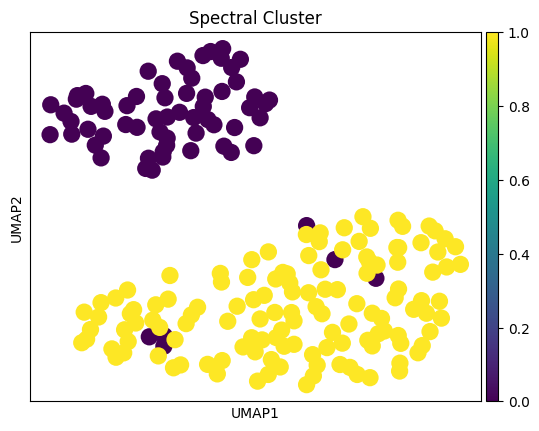

Cluster 0
celltype
TA    67
Name: count, dtype: int64
Cluster 1
celltype
TA    127
Name: count, dtype: int64


In [57]:
spectralClustering(2, filtered_adata5, 4)
analysis(filtered_adata5, 2)





c:\Users\inigo\OneDrive\Documents\GitHub\PrincOfProg\PoP_venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
c:\Users\inigo\OneDrive\Documents\GitHub\PrincOfProg\PoP_venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:453: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
c:\Users\inigo\OneDrive\Documents\GitHub\PrincOfProg\PoP_venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
c:\Users\inigo\OneDrive\Documents\GitHub\PrincOfProg\PoP_venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\inigo\OneDrive\Documents\GitHub\PrincOfProg\PoP_venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: R

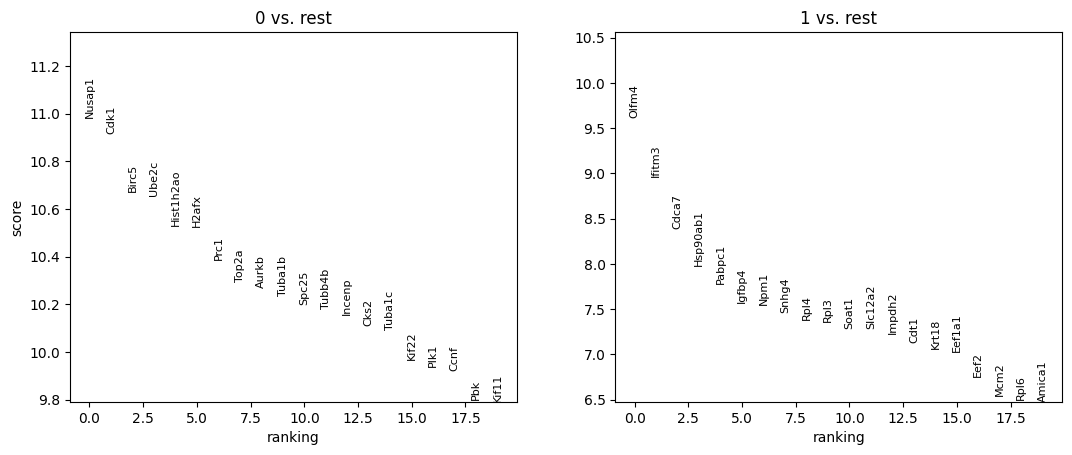

In [58]:
filtered_adata5.obs['Spectral Cluster'] = filtered_adata5.obs['Spectral Cluster'].astype('category')

sc.tl.rank_genes_groups(filtered_adata5, groupby='Spectral Cluster', method='wilcoxon')
sc.pl.rank_genes_groups(filtered_adata5, n_genes=20, sharey=False)


Is 'Cdk1' in the filtered adata? False
Is 'Cdk1' in the final filtered adata? False


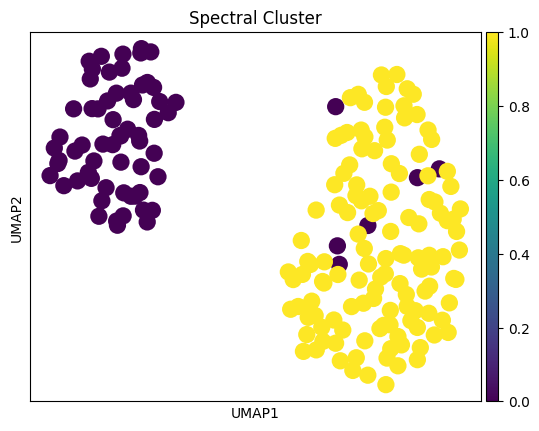

Cluster 0
celltype
TA    67
Name: count, dtype: int64
Cluster 1
celltype
TA    127
Name: count, dtype: int64
Is 'Cdk1' in the final filtered adata before ranking genes? False


c:\Users\inigo\OneDrive\Documents\GitHub\PrincOfProg\PoP_venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
c:\Users\inigo\OneDrive\Documents\GitHub\PrincOfProg\PoP_venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:453: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
c:\Users\inigo\OneDrive\Documents\GitHub\PrincOfProg\PoP_venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
c:\Users\inigo\OneDrive\Documents\GitHub\PrincOfProg\PoP_venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\inigo\OneDrive\Documents\GitHub\PrincOfProg\PoP_venv\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: R

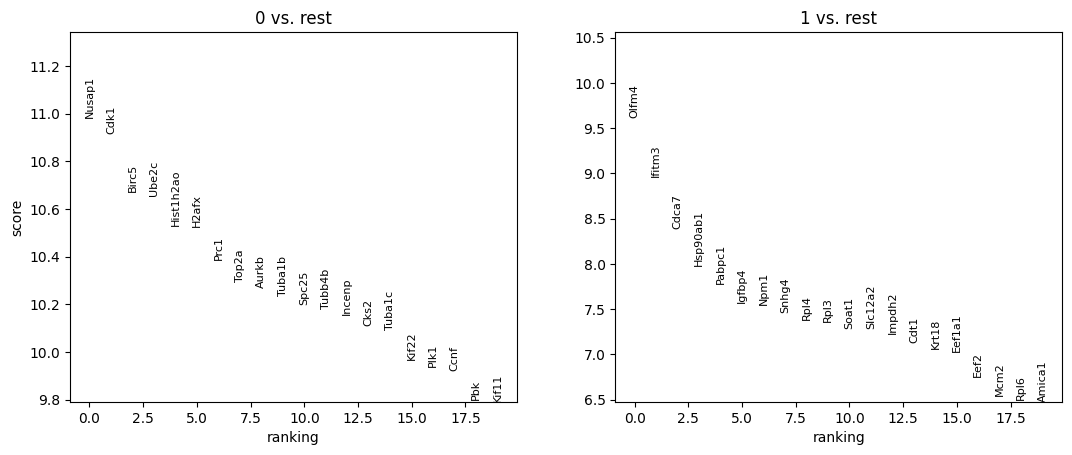

Is 'Cdk1' in the final filtered adata after ranking genes? False


In [59]:
import scanpy as sc
import pandas as pd

# List of cell cycle-related genes with only the first letter capitalized
cell_cycle_genes = [
    "Ccna1", "Ccna2", "Ccnb1", "Ccnb2", "Ccnd1", "Ccnd2", "Ccnd3", "Ccne1", "Ccne2",
    "Cdk1", "Cdk2", "Cdk4", "Cdk6", "Cdkn2a", "Cdkn2b", "Cdkn2c", "Cdkn2d", "Cdkn1a",
    "Cdkn1b", "Cdkn1c", "Rb1", "E2f1", "Cdc25a", "Cdc25b", "Cdc25c", "Wee1", "Chek1",
    "Chek2", "Tp53", "Atm", "Atr", "Brca1", "Brca2", "Mad1l1", "Mad2l1", "Bub1",
    "Bub1b", "Aurka", "Aurkb", "Plk1", "Cep152", "Stil", "Orc1", "Orc2", "Orc3",
    "Orc4", "Orc5", "Orc6", "Mcm2", "Mcm3", "Mcm4", "Mcm5", "Mcm6", "Mcm7",
    "Cdt1", "Cdc6", "Gmnn", "Anapc1", "Anapc2", "Cdc27", "Anapc4", "Cdc20", "Fzr1"
]

# Ensure the gene names are in the correct format (capitalized first letter)
adata.var_names = adata.var_names.str.capitalize()

# Filter out cell cycle genes
genes_to_keep = adata.var_names[~adata.var_names.isin(cell_cycle_genes)]

# Create a new AnnData object with the filtered genes
adata_filtered = adata[:, genes_to_keep].copy()

# Verify 'Cdk1' is removed
print(f"Is 'Cdk1' in the filtered adata? {'Cdk1' in adata_filtered.var_names}")

# Specify cell types to include
celltypes_to_include = ['TA']

# Filter the adata object to include only specified cell types
filtered_adata5 = adata_filtered[adata_filtered.obs['celltype'].isin(celltypes_to_include)].copy()

# Verify the final filtered AnnData object
print(f"Is 'Cdk1' in the final filtered adata? {'Cdk1' in filtered_adata5.var_names}")

# Proceed with the analysis

spectralClustering(2, filtered_adata5, 4)
analysis(filtered_adata5, 2)
filtered_adata5.obs['Spectral Cluster'] = filtered_adata5.obs['Spectral Cluster'].astype('category')


# Verify 'Cdk1' exclusion before ranking genes
print(f"Is 'Cdk1' in the final filtered adata before ranking genes? {'Cdk1' in filtered_adata5.var_names}")

# Rank genes
sc.tl.rank_genes_groups(filtered_adata5, groupby='Spectral Cluster', method='wilcoxon')

# Plot rank genes groups
sc.pl.rank_genes_groups(filtered_adata5, n_genes=20, sharey=False)

# Final verification
print(f"Is 'Cdk1' in the final filtered adata after ranking genes? {'Cdk1' in filtered_adata5.var_names}")


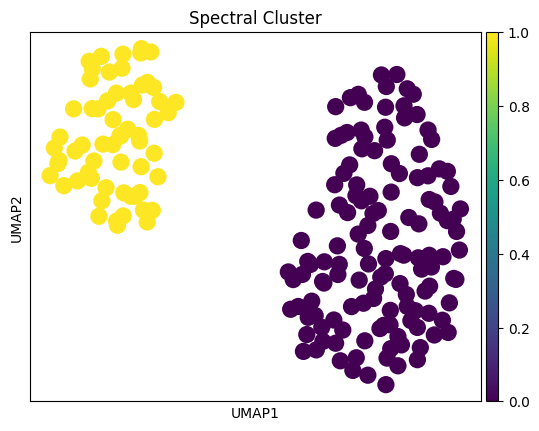

Cluster 0
celltype
TA    133
Name: count, dtype: int64
Cluster 1
celltype
TA    61
Name: count, dtype: int64


S1189_Lgr5GFP_M7_GFPLow_TA         0
S1411_Lgr5GFP_M7_GFPLow_TA         1
S1522_Lgr5GFP_M7_GFPLow_TA         0
S667_Lgr5GFP_M7_GFPLow_TA          0
S678_Lgr5GFP_M7_GFPLow_TA          0
                                  ..
S509_WT_M2_GFP-.CD24-.EpCAM+_TA    1
S515_WT_M2_GFP-.CD24-.EpCAM+_TA    0
S523_WT_M2_GFP-.CD24-.EpCAM+_TA    0
S529_WT_M2_GFP-.CD24-.EpCAM+_TA    0
S539_WT_M2_GFP-.CD24-.EpCAM+_TA    1
Name: Spectral Cluster, Length: 194, dtype: int32

In [33]:
spectralClustering(2, filtered_adata5, 4)
analysis(filtered_adata5, 2)

filtered_adata5.obs['Spectral Cluster']